## Transformer 模型起源
- 起源&发展
- 什么是Transformer
- Hugging Face 提供的 Transformer Lib

本系列文章介绍Huggingface Transformers的用法。其所提供的大量预训练模型和代码等资源被广泛的应用于学术研究当中。

Transformers提供了数以千计针对于各种任务的预训练模型模型，开发者可以根据自身的需要，选择模型进行训练或微调，也可阅读api文档和源码， 快速开发新模型。

### 项目信息
- hubgging hub : https://huggingface.co/
- Transformer Lib : https://github.com/huggingface/transformers
- Attetion 论文地址：https://arxiv.org/abs/1706.03762

## 起源&发展
- 2017 年 Google 在《Attention Is All You Need》中提出了 Transformer 结构用于序列标注
- Fast AI 在《Universal Language Model Fine-tuning for Text Classification》中提出了一种名为 ULMFiT 的迁移学习方法，将在大规模数据上预训练好的 LSTM 模型迁移用于文本分类，只用很少的标注数据就达到了最佳性能

这些具有开创性的工作促成了两个著名 Transformer 模型的出现：
- GPT (the Generative Pretrained Transformer)；
- BERT (Bidirectional Encoder Representations from Transformers)。
通过将 Transformer 结构与无监督学习相结合，我们不再需要对每一个任务都从头开始训练模型，并且几乎在所有 NLP 任务上都远远超过先前的最强基准。

- NLP模型发展历史：

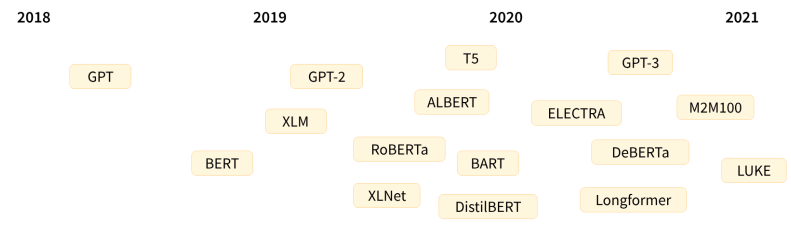

### transformer按模型结构将它们大致分为三类：
- 纯 Encoder 模型（例如 BERT），又称自编码 (auto-encoding) Transformer 模型；
- 纯 Decoder 模型（例如 GPT），又称自回归 (auto-regressive) Transformer 模型；
- Encoder-Decoder 模型（例如 BART、T5），又称 Seq2Seq (sequence-to-sequence) Transformer 模型。

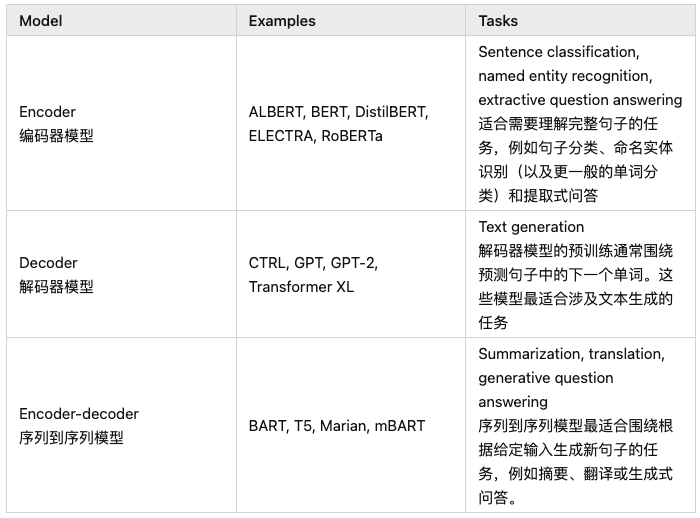

## Transformer
### 语言模型
Transformer 模型本质上都是预训练语言模型，大都采用自监督学习 (Self-supervised learning) 的方式在大量生语料上进行训练，也就是说，训练这些 Transformer 模型完全不需要人工标注数据。

> 自监督学习是一种训练目标可以根据模型的输入自动计算的训练方法。

### Transformer 的结构
标准的 Transformer 模型主要由两个模块构成：

- Encoder（左边）：负责理解输入文本，为每个输入构造对应的语义表示（语义特征）；

- Decoder（右边）：负责生成输出，使用 Encoder 输出的语义表示结合其他输入来生成目标序列。


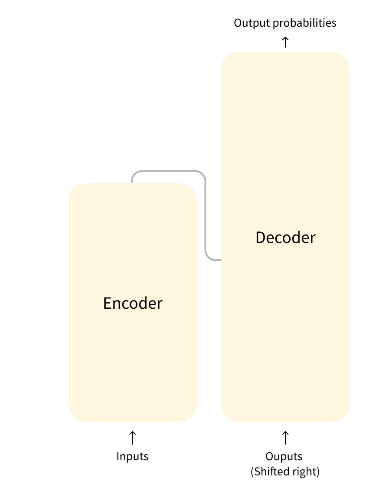

这两个模块可以根据任务的需求而单独使用：

- 纯 Encoder 模型：适用于只需要理解输入语义的任务，例如句子分类、命名实体识别；
- 纯 Decoder 模型：适用于生成式任务，例如文本生成；
- Encoder-Decoder 模型或 Seq2Seq 模型：适用于需要基于输入的生成式任务，例如翻译、摘要。

### Transformer初衷
原始的 Transformer 模型结构如下图所示，Encoder 在左，Decoder 在右：


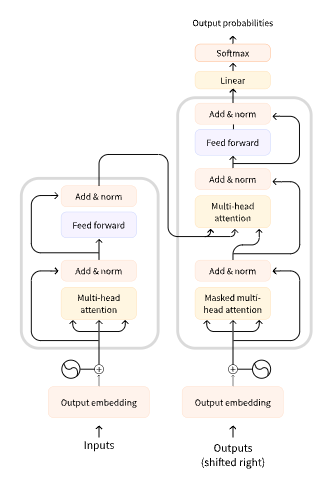

流程：在训练过程中，Encoder 接受源语言的句子作为输入，而 Decoder 则接受目标语言的翻译作为输入。在 Encoder 中，由于翻译一个词语需要依赖于上下文，因此注意力层可以访问句子中的所有词语；而 Decoder 是顺序地进行解码，在生成每个词语时，注意力层只能访问前面已经生成的单词

其中，Decoder 中的第一个注意力层关注 Decoder 过去所有的输入，而第二个注意力层则是使用 Encoder 的输出，因此 Decoder 可以基于整个输入句子来预测当前词语。这对于翻译任务非常有用，因为同一句话在不同语言下的词语顺序可能并不一致（不能逐词翻译），所以出现在源语言句子后部的词语反而可能对目标语言句子前部词语的预测非常重要

>在 Encoder/Decoder 的注意力层中，我们还会使用 Attention Mask 遮盖掉某些词语来防止模型关注它们，例如为了将数据处理为相同长度而向序列中添加的填充 (padding) 字符。


在 Transformer 模型提出之前，对 token 序列 $X$ 的常规编码方式是通过循环网络 (RNNs) 和卷积网络 (CNNs)。
- RNN（例如 LSTM）的方案很简单，每一个词语$x_t$对应的编码结果$y_t$通过递归地计算得到

缺点：RNN 的序列建模方式虽然与人类阅读类似，但是递归的结构导致其无法并行计算，因此速度较慢。而且 RNN 本质是一个马尔科夫决策过程，难以学习到全局的结构信息；

- CNN 则通过滑动窗口基于局部上下文来编码文本，例如核尺寸为 3 的卷积操作就是使用每一个词自身以及前一个和后一个词来生成嵌入式表示

缺点：CNN 能够并行地计算，因此速度很快，但是由于是通过窗口来进行编码，所以更侧重于捕获局部信息，难以建模长距离的语义依赖。


### Transformer 家族
虽然新的 Transformer 模型层出不穷，但是它们依然可以被归纳到以下三种结构中：

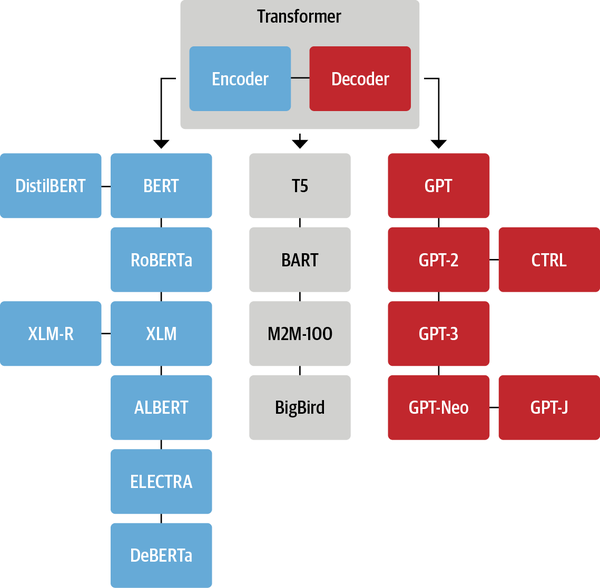

## 参考：
- https://zhuanlan.zhihu.com/p/448852278
- https://transformers.run/back/transformer/